In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import STAGATE
import anndata as ad

# E11-2

## Joint

In [3]:
adata = sc.read_h5ad("./E11-2_PCA_LSI.h5ad")
coor_df = adata.obs.loc[:,['cod_1', 'cod_2']]
adata.obsm["spatial"] = coor_df.to_numpy()
adata

AnnData object with n_obs × n_vars = 2099 × 99
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_peaks', 'nFeature_peaks', 'seurat_clusters_rna', 'seurat_clusters_atac', 'seurat_clusters_joint', 'cod_1', 'cod_2'
    var: 'features'
    obsm: 'spatial'

In [ ]:
#---sub PCA and LSI


------Calculating spatial graph...
The graph contains 15444 edges, 2099 cells.
7.3578 neighbors per cell on average.


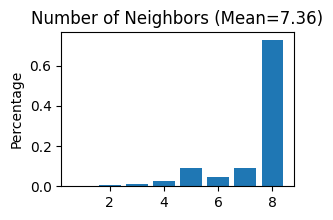

In [6]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=1.5)
STAGATE.Stats_Spatial_Net(adata)

In [24]:
adata = STAGATE.train_STAGATE(adata,
                              alpha=0.8, 
                              pre_labels = 'seurat_clusters_joint',
                              n_epochs=1000, 
                              save_attention=True)

Size of Input:  (2099, 99)
------Pruning the graph...
15444 edges before pruning.
12080 edges after pruning.


100%|██████████| 1000/1000 [01:37<00:00, 10.26it/s]


(-2.45, 51.45, -2.45, 51.45)

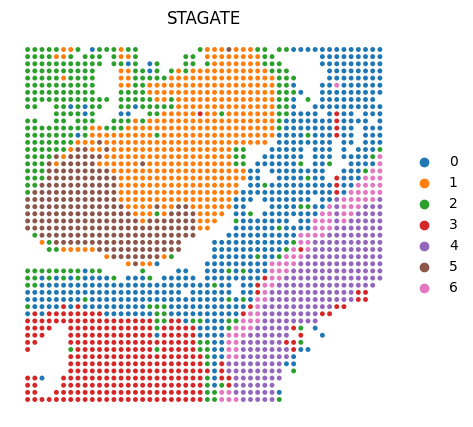

In [25]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=0.7)
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.embedding(adata, basis="spatial", color="louvain",s=50, show=False, title='STAGATE')
plt.axis('off')

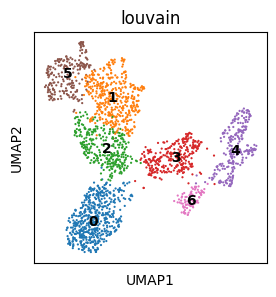

In [26]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color="louvain", legend_loc='on data', s=10)

In [28]:
adata.obs.to_csv('E11-2_PCA_LSI_meta_pl_a0.8r0.7.csv')

In [29]:
pd.DataFrame(adata.obsm['X_umap']).to_csv("E11-2_PCA_LSI_umap_pl_a0.8r0.7.csv")

## RNA

In [30]:
adata = sc.read_h5ad("./E11-2.h5ad")
coor_df = adata.obs.loc[:,['cod_1', 'cod_2']]
adata.obsm["spatial"] = coor_df.to_numpy()
adata

AnnData object with n_obs × n_vars = 2099 × 19169
    obs: 'nCount_peaks', 'nFeature_peaks', 'seurat_clusters_rna', 'seurat_clusters_atac', 'seurat_clusters_joint', 'cod_1', 'cod_2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'spatial'

In [31]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

------Calculating spatial graph...
The graph contains 15444 edges, 2099 cells.
7.3578 neighbors per cell on average.


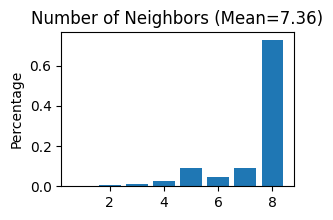

In [34]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=1.5)
STAGATE.Stats_Spatial_Net(adata)

In [35]:
adata = STAGATE.train_STAGATE(adata,
                              alpha=0.8, 
                              pre_labels='seurat_clusters_rna',
                              n_epochs=1000, 
                              save_attention=False)

Size of Input:  (2099, 3000)
------Pruning the graph...
15444 edges before pruning.
10322 edges after pruning.


100%|██████████| 1000/1000 [03:04<00:00,  5.41it/s]


(-2.45, 51.45, -2.45, 51.45)

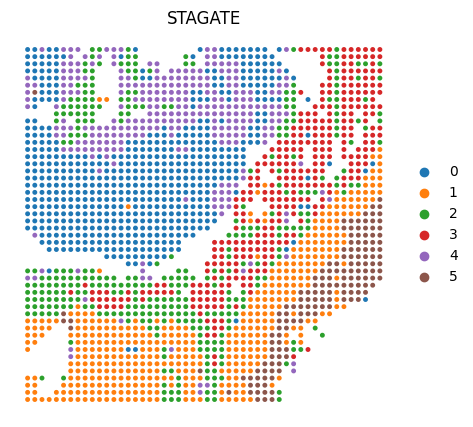

In [37]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=0.7)
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.embedding(adata, basis="spatial", color="louvain",s=50, show=False, title='STAGATE')
plt.axis('off')

In [43]:
adata.obs.to_csv('E11-2_rna_meta_pl_a0.8r0.7.csv')

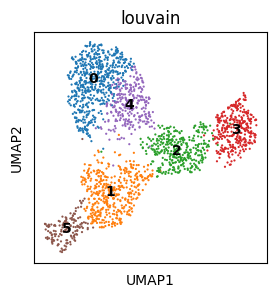

In [39]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color="louvain", legend_loc='on data', s=10)

In [42]:
pd.DataFrame(adata.obsm['X_umap']).to_csv("E11-2_rna_umap_pl_a0.8r0.7.csv")

## ATAC

In [44]:
adata = sc.read_h5ad("./E11-2_LSI_-1.h5ad")
coor_df = adata.obs.loc[:,['cod_1', 'cod_2']]
adata.obsm["spatial"] = coor_df.to_numpy()
adata

AnnData object with n_obs × n_vars = 2099 × 49
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_peaks', 'nFeature_peaks', 'seurat_clusters_rna', 'seurat_clusters_atac', 'seurat_clusters_joint', 'cod_1', 'cod_2'
    var: 'features'
    obsm: 'spatial'

------Calculating spatial graph...
The graph contains 15444 edges, 2099 cells.
7.3578 neighbors per cell on average.


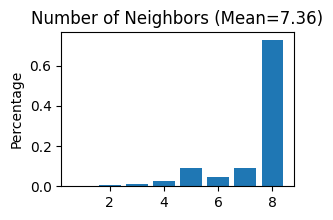

In [45]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=1.5)
STAGATE.Stats_Spatial_Net(adata)

In [46]:
adata = STAGATE.train_STAGATE(adata,
                              alpha=0.8, 
                              pre_labels='seurat_clusters_atac',
                              n_epochs=1000, 
                              save_attention=False)

Size of Input:  (2099, 49)
------Pruning the graph...
15444 edges before pruning.
10966 edges after pruning.


100%|██████████| 1000/1000 [02:18<00:00,  7.21it/s]


(-2.45, 51.45, -2.45, 51.45)

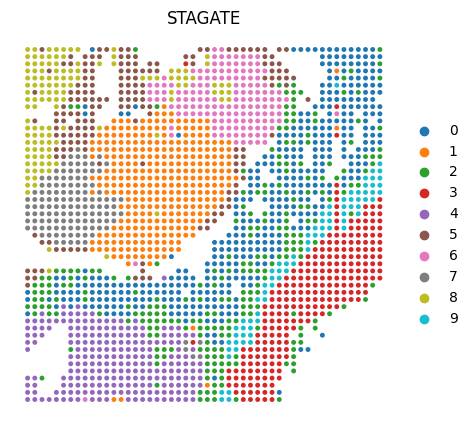

In [47]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=0.7)
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.embedding(adata, basis="spatial", color="louvain",s=50, show=False, title='STAGATE')
plt.axis('off')

In [48]:
adata.obs.to_csv('E11-2_LSI_meta_pl_a0.8r0.7.csv')

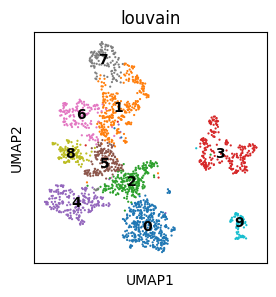

In [51]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color="louvain", legend_loc='on data', s=10)

In [54]:
pd.DataFrame(adata.obsm['X_umap']).to_csv("E11-2_LSI_umap_pl_a0.8r0.7.csv")